# Convolutional Neural Networks and image classification

<br>

<div>
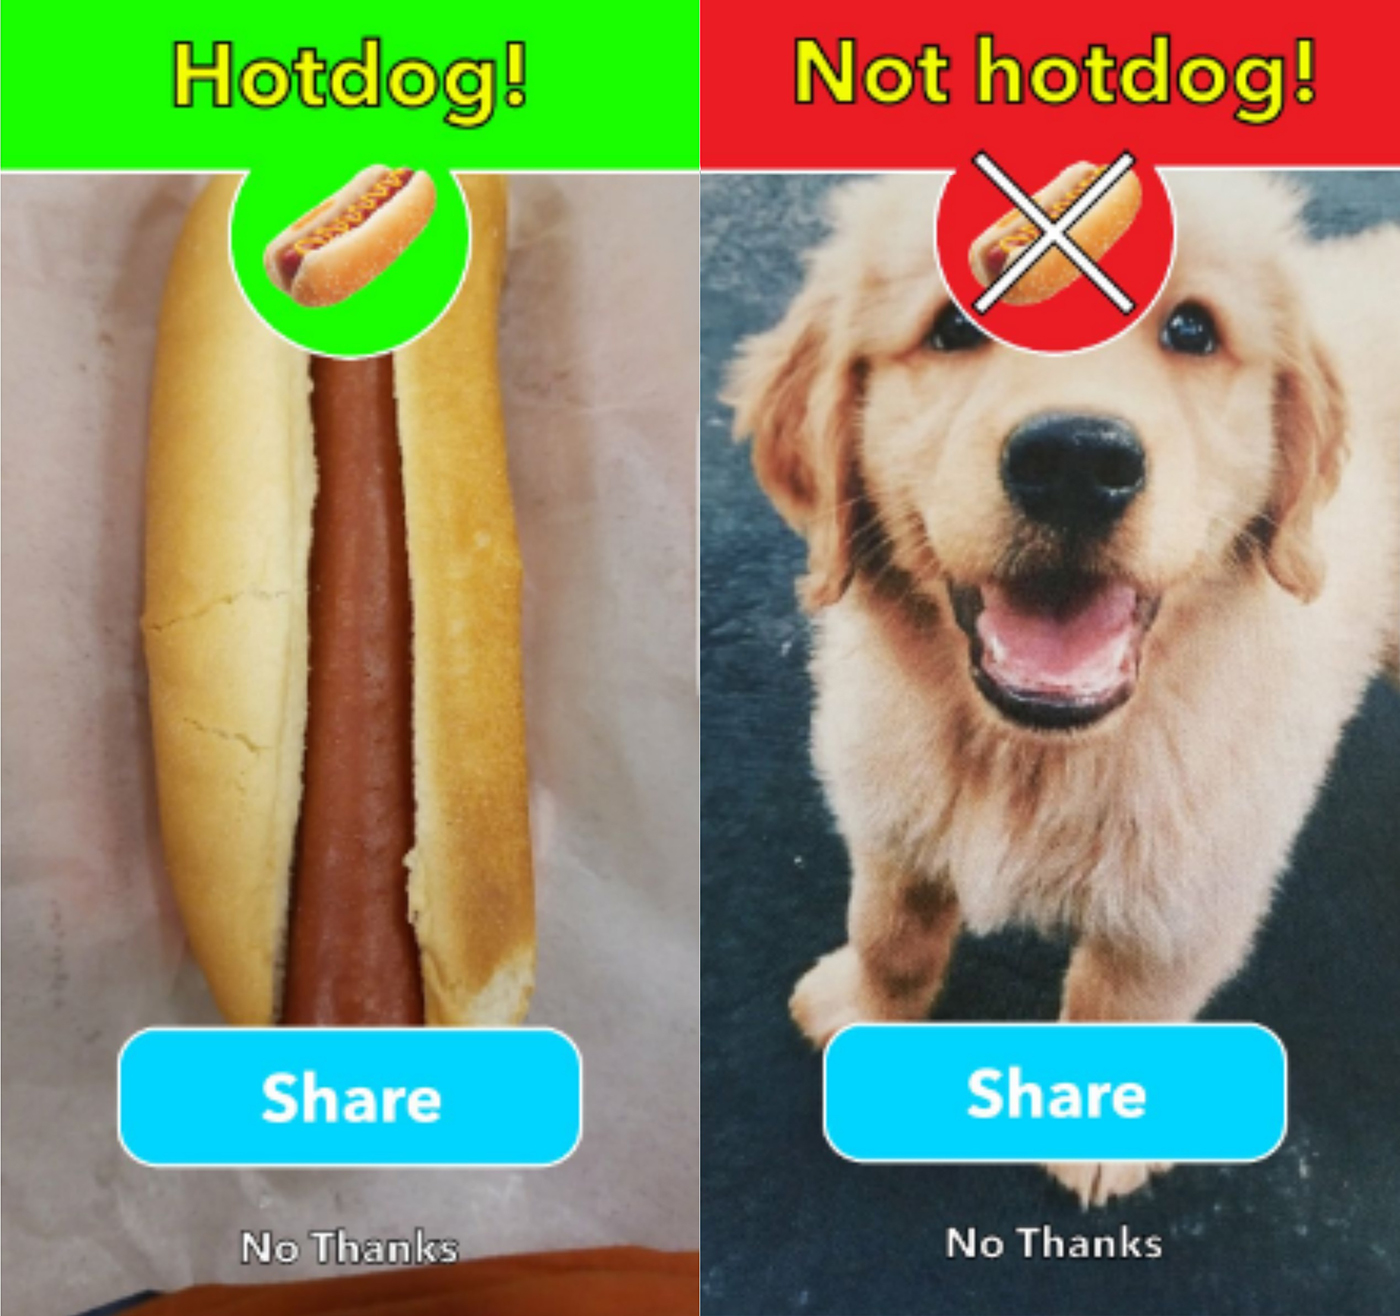
</div>

**source:** https://www.oreilly.com/ideas/not-hotdog-vs-mission-critical-ai-applications-for-the-enterprise

### Load Tensorflow, Keras and others

In [1]:
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from six.moves import cPickle as pickle
import os
import zipfile
import random

### Load the MNIST dataset

The MNIST dataset consists of black and white images of handwritten numbers between 0 and 9. Each image is given by 28x28 matrix with integer values between 0 and 255.

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train * 1.0
x_test = x_test * 1.0

print("The train dataset has {} images".format(len(x_train)))
print("The test dataset has {} images".format(len(x_test)))

The train dataset has 60000 images
The test dataset has 10000 images



Samples

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   5.
  117. 242.  26.  16.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 107.
  253. 254. 217. 240. 124.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 118. 247.
  253. 254. 253. 253. 253.  61.   0.   0.   0.  

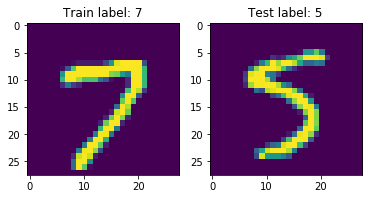

In [166]:
print("\nSamples\n")
print(x_train[index])
print(x_test[index])

index = random.randint(0, 10000 - 1)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(x_train[index]);
ax[0].set_title("Train label: {}".format(y_train[index]));
ax[1].imshow(x_test[index]);
ax[1].set_title("Test label: {}".format(y_test[index]));

## Start training the model

<br>

<div>
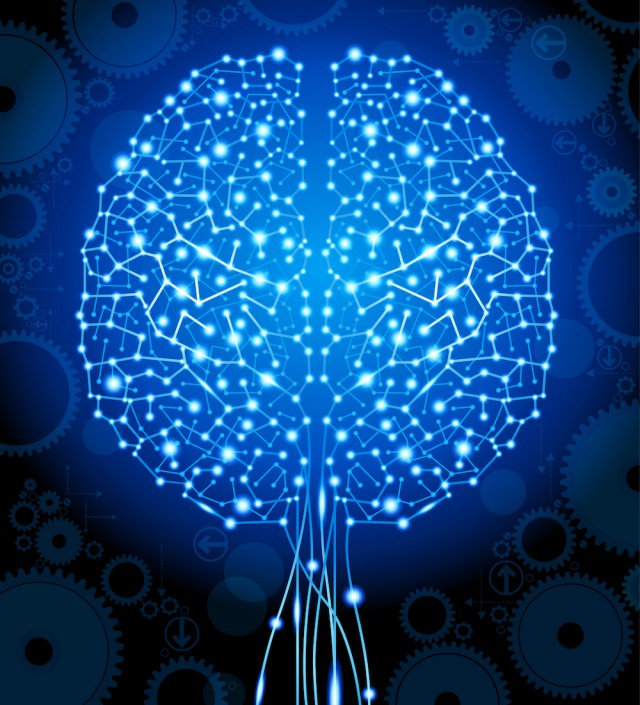
</div>

<br>

Using the `Sequential` api in keras we can easily give a model in almost no time.

In [4]:
from tensorflow.keras.optimizers import SGD

model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=SGD(),
              loss='mean_squared_error',
              metrics=['accuracy']
             )

# model.summary()

As usual, check the documentation
https://keras.io
to clarify doubts or questions.

Since the output of the predictions will be a vector with length 10, we adapt the labels format.

In [5]:
f = lambda x : np.eye(1, 10, int(x-1))[0]

y_train_m = np.array([f(x) for x in y_train])
y_test_m = np.array([f(x) for x in y_test])

### First iteration

In [6]:
history = model.fit(x_train, y_train_m, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1239 - acc: 0.3325
Epoch 2/15
60000/60000 [==============================] - 2s 35us/sample - loss: 0.1157 - acc: 0.3714
Epoch 3/15
60000/60000 [==============================] - 2s 36us/sample - loss: 0.1148 - acc: 0.3756
Epoch 4/15
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1041 - acc: 0.42850s - loss: 0.1048 - a
Epoch 5/15
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1018 - acc: 0.4405
Epoch 6/15
60000/60000 [==============================] - 2s 36us/sample - loss: 0.1019 - acc: 0.4399
Epoch 7/15
60000/60000 [==============================] - 2s 35us/sample - loss: 0.1003 - acc: 0.4483
Epoch 8/15
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0994 - acc: 0.4527
Epoch 9/15
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0991 - acc: 0.4541
Epoch 10/15
60000/60000 [==============================] - 2s

10000/10000 [==============================] - 0s 25us/sample - loss: 0.0828 - acc: 0.5362


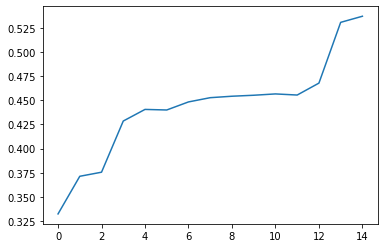

In [7]:
model.evaluate(x_test, y_test_m)

# show the plot of the accuracy
plt.plot(history.history['acc'])

### Normalize the data

In [171]:
history = model.fit(x_train / 255.0, y_train_m,
                    epochs=10,
                    validation_data=(x_test / 255.0, y_test_m))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0484 - acc: 0.6361 - val_loss: 0.0458 - val_acc: 0.6371
Epoch 2/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0443 - acc: 0.6376 - val_loss: 0.0412 - val_acc: 0.6631
Epoch 3/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0388 - acc: 0.7138 - val_loss: 0.0354 - val_acc: 0.7482
Epoch 4/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0341 - acc: 0.7617 - val_loss: 0.0316 - val_acc: 0.7768
Epoch 5/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0311 - acc: 0.7774 - val_loss: 0.0291 - val_acc: 0.7866
Epoch 6/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0291 - acc: 0.7830 - val_loss: 0.0274 - val_acc: 0.7916
Epoch 7/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0277 - acc: 0.7869 - val_loss: 0.

In [172]:
model.evaluate(x_test / 255.0, y_test_m)

10000/10000 [==============================] - 0s 22us/sample - loss: 0.0239 - acc: 0.7973


[0.023949301713705063, 0.7973]

## Learning curves

Show the accuracy plots for the train and test data during the training will help us understand how the model is performing.

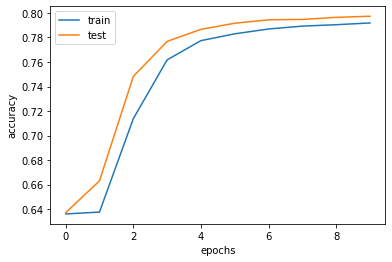

In [173]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### Use different loss functions

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

# model.summary()

In [11]:
history = model.fit(x_train / 255.0, y_train,
                    epochs=10,
                    validation_data=(x_test / 255.0, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.7857 - acc: 0.8132 - val_loss: 0.4807 - val_acc: 0.8813
Epoch 2/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.4566 - acc: 0.8800 - val_loss: 0.4010 - val_acc: 0.8951
Epoch 3/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.4038 - acc: 0.8906 - val_loss: 0.3681 - val_acc: 0.9004
Epoch 4/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3774 - acc: 0.8966 - val_loss: 0.3491 - val_acc: 0.9048
Epoch 5/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3606 - acc: 0.9003 - val_loss: 0.3370 - val_acc: 0.9086
Epoch 6/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3487 - acc: 0.9036 - val_loss: 0.3281 - val_acc: 0.9094
Epoch 7/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3397 - acc: 0.9054 - val_loss: 0.

10000/10000 [==============================] - 0s 22us/sample - loss: 43.5738 - acc: 0.9049


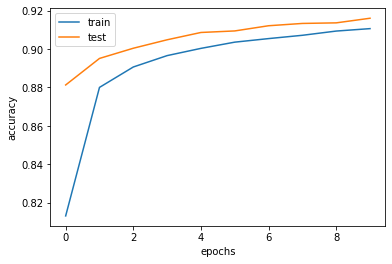

In [12]:
model.evaluate(x_test, y_test)

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Multiple layers

Like the name says, one strategy that has proven to be effective many times is adding hidden layers to our model, thus making it "deeper". These layers should be picked wisely to improve the performance of the model.

<div>
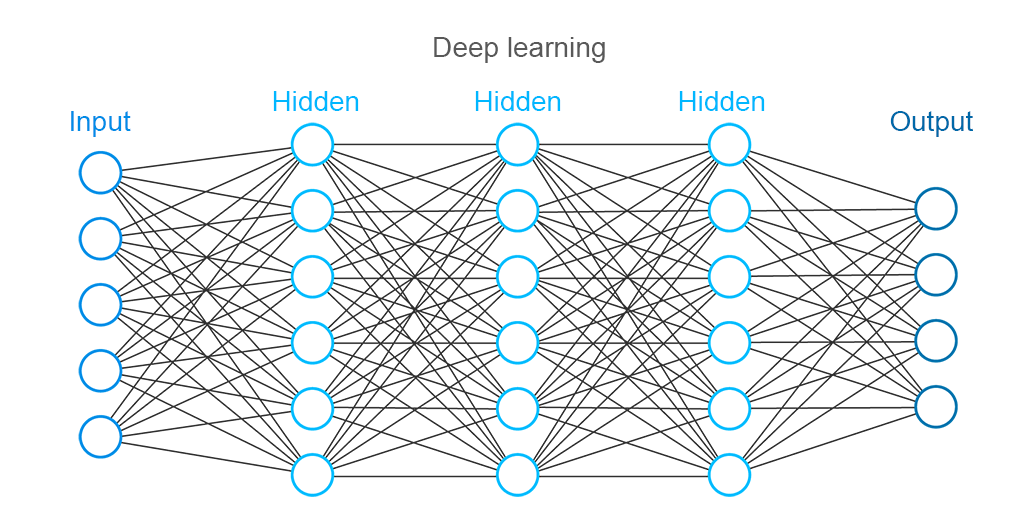
</div>

**source:** https://www.altexsoft.com/whitepapers/fraud-detection-how-machine-learning-systems-help-reveal-scams-in-fintech-healthcare-and-ecommerce/

In doing so, applying a nonlinear transformation to the weights computed during training often gives better results. One of the easiest transformations is applying a relu.

<div>
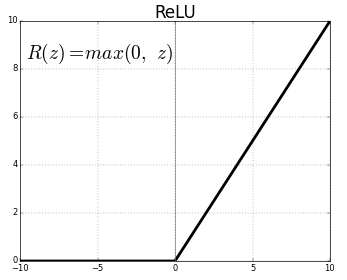
</div>

**source:** https://ml4a.github.io/ml4a/neural_networks/

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

In [178]:
history = model.fit(x_train / 255.0, y_train,
                    epochs=15,
                    validation_data=(x_test / 255.0, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 3s 57us/sample - loss: 0.6483 - acc: 0.8390 - val_loss: 0.3532 - val_acc: 0.9049
Epoch 2/15
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3353 - acc: 0.9062 - val_loss: 0.2913 - val_acc: 0.9200
Epoch 3/15
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2861 - acc: 0.9202 - val_loss: 0.2604 - val_acc: 0.9261
Epoch 4/15
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2560 - acc: 0.9282 - val_loss: 0.2364 - val_acc: 0.9341
Epoch 5/15
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2333 - acc: 0.9347 - val_loss: 0.2196 - val_acc: 0.9378
Epoch 6/15
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2152 - acc: 0.9397 - val_loss: 0.2054 - val_acc: 0.9416
Epoch 7/15
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2001 - acc: 0.9438 - val_loss: 0.

10000/10000 [==============================] - 0s 36us/sample - loss: 19.2190 - acc: 0.9559


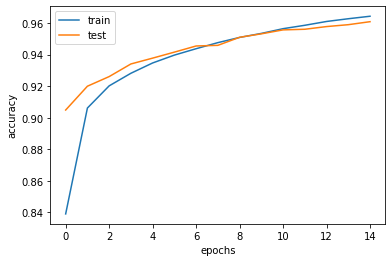

In [179]:
model.evaluate(x_test, y_test)

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Convolutional Neural Networks

This is a technique that highlights/extract features from an image and allows neural network to capture them. 

Under the hood it looks like the following.

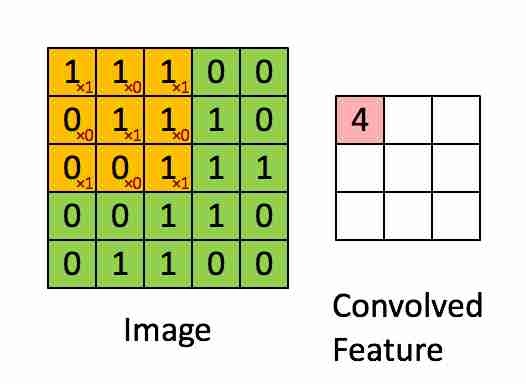

**source:** https://mc.ai/convolution-operations-and-image-processing/

You can do some more experiments on the website http://setosa.io/ev/image-kernels/, and https://en.wikipedia.org/wiki/Kernel_(image_processing)

In [14]:
from tensorflow.keras.optimizers import RMSprop

x_train_imgs = x_train.reshape(60000, 28, 28, 1)
x_train_imgs = x_train_imgs / 255.0
x_test_imgs = x_test.reshape(10000, 28, 28, 1)
x_test_imgs = x_test_imgs /  255.0

model = keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=SGD(), # RMSprop(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

# model.summary()

In [15]:
history = model.fit(x_train_imgs, y_train,
                    epochs=5,
                    validation_data=(x_test_imgs, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 17s 278us/sample - loss: 0.4624 - acc: 0.8770 - val_loss: 0.2571 - val_acc: 0.9220
Epoch 2/5
60000/60000 [==============================] - 17s 276us/sample - loss: 0.2170 - acc: 0.9357 - val_loss: 0.1699 - val_acc: 0.9504
Epoch 3/5
60000/60000 [==============================] - 17s 278us/sample - loss: 0.1643 - acc: 0.9516 - val_loss: 0.1359 - val_acc: 0.9600
Epoch 4/5
60000/60000 [==============================] - 17s 277us/sample - loss: 0.1339 - acc: 0.9611 - val_loss: 0.1190 - val_acc: 0.9655
Epoch 5/5
60000/60000 [==============================] - 17s 277us/sample - loss: 0.1140 - acc: 0.9660 - val_loss: 0.1026 - val_acc: 0.9699


10000/10000 [==============================] - 1s 90us/sample - loss: 0.1026 - acc: 0.9699


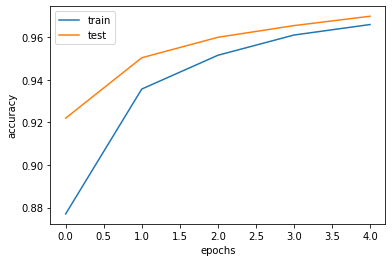

In [16]:
model.evaluate(x_test_imgs, y_test)

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### Exercise: Can you improve this model?

<br>

<div>
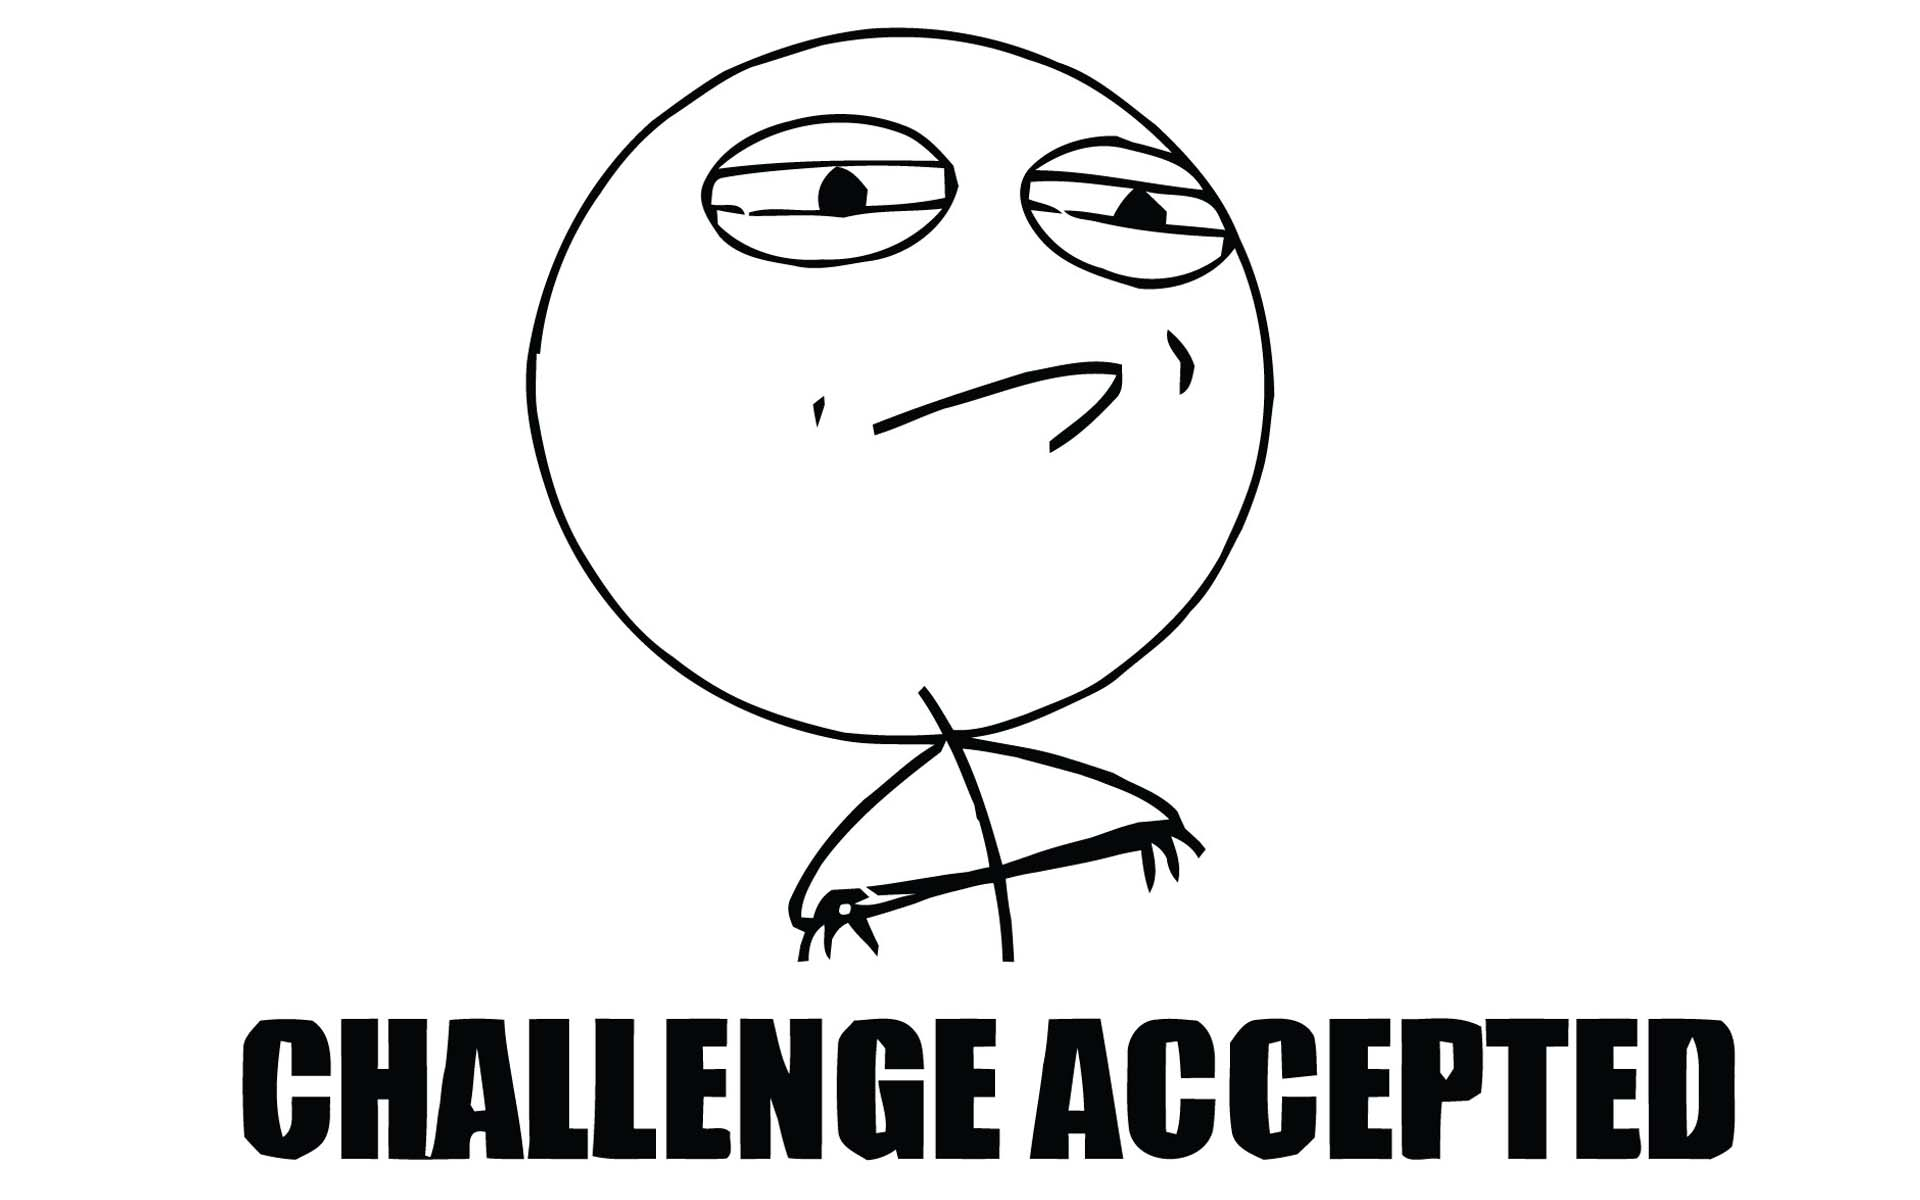
</div>